/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: i

/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wangchenjie/opt/anaconda3/envs/MDM/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: i

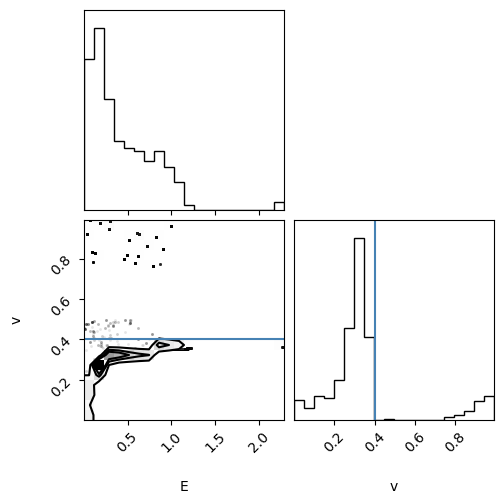

In [2]:
import numpy as np
from scipy.optimize import minimize
import emcee
import matplotlib.pyplot as plt
import corner

# Generate example data
n = 20
strain = np.linspace(0, 1, n)
stress = 10 * (strain + 0.2 * np.random.randn(n))

# Define the model and prior distributions
def yeoh_model(params, strain):
    E, v = params
    I1 = np.sum(strain)
    W = E / 2 * (I1 - 3) + E * v / 2 * (I1 - 3) ** 2 + E * (1 - 3 * v) / 3 * (I1 - 3) ** 3
    return W

def log_prior(params):
    E, v = params
    if 0 < E < 1000 and 0 < v < 0.5:
        return 0.0
    return -np.inf

def log_likelihood(params, strain, stress):
    W = yeoh_model(params, strain)
    sigma2 = 0.1 ** 2
    return -0.5 * np.sum((stress - W) ** 2 / sigma2)

def log_posterior(params, strain, stress):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, strain, stress)

# Run the MCMC sampler
ndim, nwalkers = 2, 100
p0 = [minimize(lambda *args: -log_posterior(*args,strain,stress), np.random.rand(ndim)).x for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(strain, stress))
sampler.run_mcmc(p0, 1000)

# Plot the posterior distributions
samples = sampler.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["E", "v"], truths=[10, 0.4])
plt.show()
